# CS 5050: Semester Project
Colleen Callahan (cc5dh)  
Tyler Manderfield (jtm4qx)  
Clair McLafferty (cm2rh)  
Marissa Shand (mes7jt)  

## Import Packages and Loading in the Data

In [ ]:
# Import packages
import requests
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import xlrd
from datetime import datetime
from datetime import timedelta
from Analysis_Class import stringency_affect_n_weeks_later, sortedGroupbySum, sortedGroupbyMax, correlate

# Set plotly to be main plotting package
pd.options.plotting.backend = "plotly"

### Pull the Latest Data from Our World in Data

In [ ]:
# Establish url pointing to our data source location
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

# Get text from the raw csv on the github page
text = requests.get(url).text

# Save text as the same file name to overwrite previous versions
# https://stackoverflow.com/questions/37289951/python-write-to-csv-line-by-line
with open("owid-covid-data.csv", "w") as f:
    f.write(text)

### Read in the COVID Dataset

In [ ]:
# Read in the dataset
covid = pd.read_csv("owid-covid-data.csv")
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [ ]:
# Look at summary statistics of the numerical variables
covid.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,3.453200e+04,34532.000000,34532.000000,34532.000000,34468.000000,34468.000000,34468.000000,34468.000000,10810.000000,1.116400e+04,...,31200.000000,30975.000000,20726.000000,31391.000000,32441.000000,24870.000000,24570.000000,14408.000000,28514.000000,34386.000000
mean,5.591961e+04,1072.603904,2820.002983,40.573323,1181.224459,18.417356,42.846917,0.539348,17337.288992,8.582183e+05,...,5.969661,21445.666623,11.581670,249.762116,8.039665,10.969978,32.627866,53.116531,3.141677,74.207103
std,5.718551e+05,9928.361488,26686.107891,351.234530,2811.296658,62.791382,125.674001,2.993556,63829.587654,3.452220e+06,...,4.356104,20672.427660,18.810781,117.882856,4.122964,10.501366,13.338797,31.482840,2.545258,7.323805
min,0.000000e+00,-2461.000000,0.000000,-1918.000000,0.000000,-265.189000,0.000000,-41.023000,-3743.000000,1.000000e+00,...,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,2.300000e+01,0.000000,0.000000,0.000000,10.045000,0.000000,0.000000,0.000000,825.000000,2.895650e+04,...,2.162000,5819.495000,0.500000,153.493000,5.310000,1.900000,21.400000,22.863000,1.380000,70.390000
50%,5.090000e+02,6.000000,10.000000,0.000000,177.742000,0.864000,2.362000,0.000000,2869.500000,1.222395e+05,...,4.458000,14600.861000,1.700000,235.954000,7.110000,6.434000,31.400000,55.182000,2.540000,75.800000
75%,5.838000e+03,110.000000,115.000000,2.000000,1023.812000,11.323250,24.359000,0.148000,9915.250000,4.794205e+05,...,9.720000,32605.906000,15.000000,318.949000,10.180000,19.600000,40.900000,83.741000,4.210000,80.070000
max,1.851958e+07,298082.000000,700539.000000,10504.000000,38714.223000,4944.376000,1237.551000,200.040000,929838.000000,5.754385e+07,...,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000


## Assess Missingness in Our Data

Since we are still in the middle of this pandemic, we begin by assessing missingness in our data to determine what useable information we have.

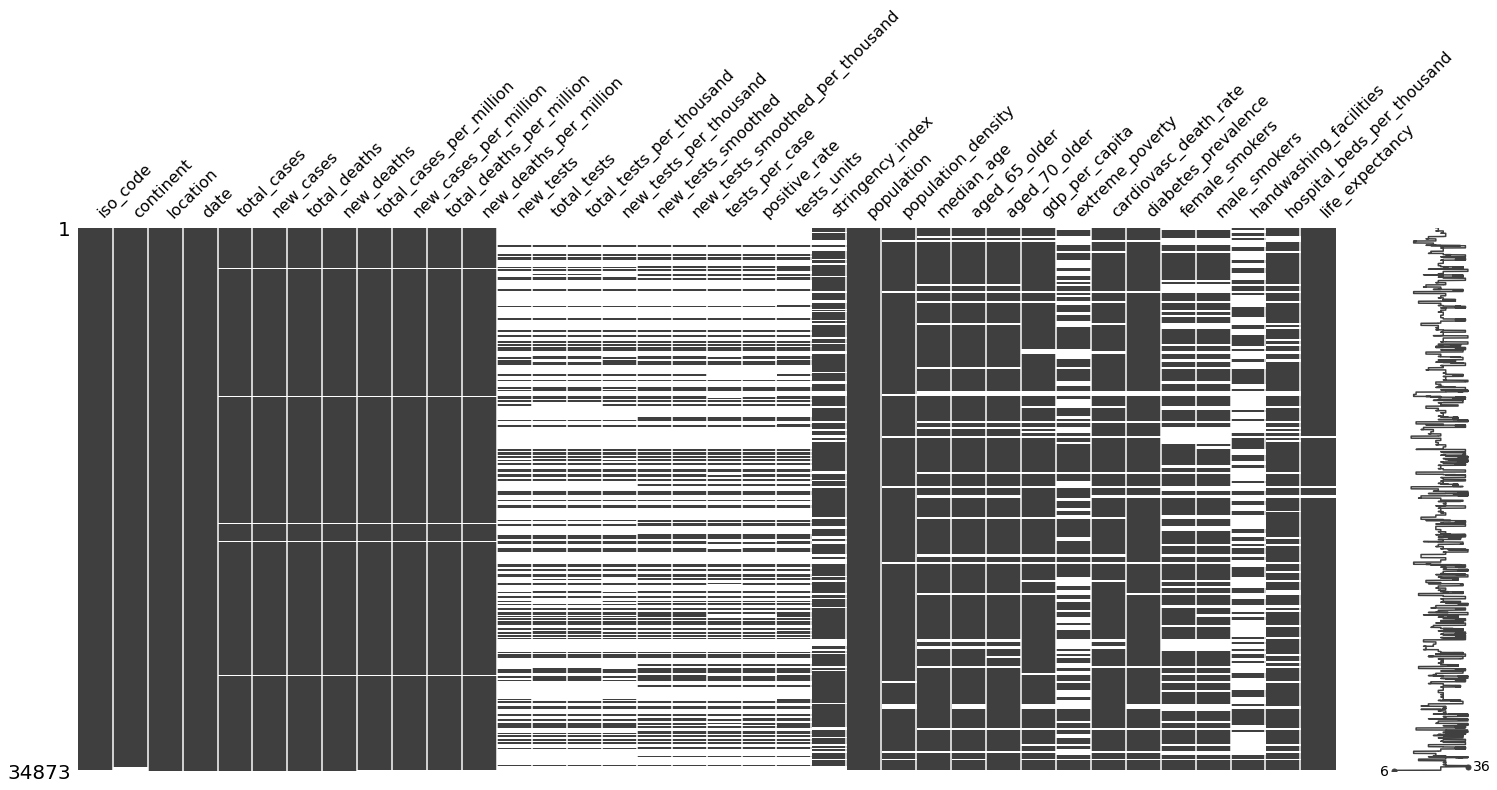

In [ ]:
# Look at missingness in our dataset
msno.matrix(covid)

There appears to be a fair number of missing values in our dataset. Especially in handwashing facilities, smoker rates, extreme poverty, and testing variables. 

### Does the GDP per Capita of a Country Affect How Many Missing Values that Country Has? 

In [ ]:
# Does GDP Per Capita affect the amount of missingness?
# Hypothesis: countries with higher GDP Per Capita will have more information

# Add a new column to covid that has the number of missing values for each row
covid["missing"] = covid.isnull().sum(axis = 1)

# For each country, get GDP per capita and average missing values 
# Drop na's so that we have full information
missingness = covid.groupby("location").agg(gdp_per_capita = ("gdp_per_capita", "mean"), avg_missing = ("missing", "mean")).reset_index().dropna()
missingness

# What is the median missingess for the top 20 gdp per capita countries? 
top_20_gdp = missingness.sort_values(by = "gdp_per_capita", ascending=False).head(20)
top_20_gdp

med_missing_top_20 = np.median(top_20_gdp["avg_missing"])
med_missing_top_20       # Output: 4.916935195130684

# What is the median missingness for the bottom 20 gdp per capita countries?
bottom_20_gdp = missingness.sort_values(by = "gdp_per_capita").head(20)
bottom_20_gdp

med_missing_bottom_20 = np.median(bottom_20_gdp["avg_missing"])
med_missing_bottom_20    # Output: 7.139705882352941

# Make dataframe for information
data = {"GDP Per Cap": ["Top 20 Countries", "Bottom 20 Countries"],
        "Median Missing Values": [med_missing_top_20, med_missing_bottom_20]}

med_missing = pd.DataFrame(data)
med_missing

,GDP Per Cap,Median Missing Values
0,Top 20 Countries,5.694467
1,Bottom 20 Countries,9.058032


### Narrowing Down Our Data Set
To narrow down our data set, we will look at which countries have the least amount of missing information in particular variables of interest such as the stringency index, share of male and female smokers, hospital beds per thousand, and GDP per capita.

In [ ]:
# Remove missingess in columns we want to do analysis on to see what countries we should analyze
# stringency_index, female_smokers, male_smokers, hospital_beds_per_thousand, gdp_per_capita
nonnull_data = covid.dropna(subset=["stringency_index", "female_smokers", "male_smokers", "hospital_beds_per_thousand", "gdp_per_capita"])

# Check that there are less rows
assert(len(nonnull_data) < len(covid))

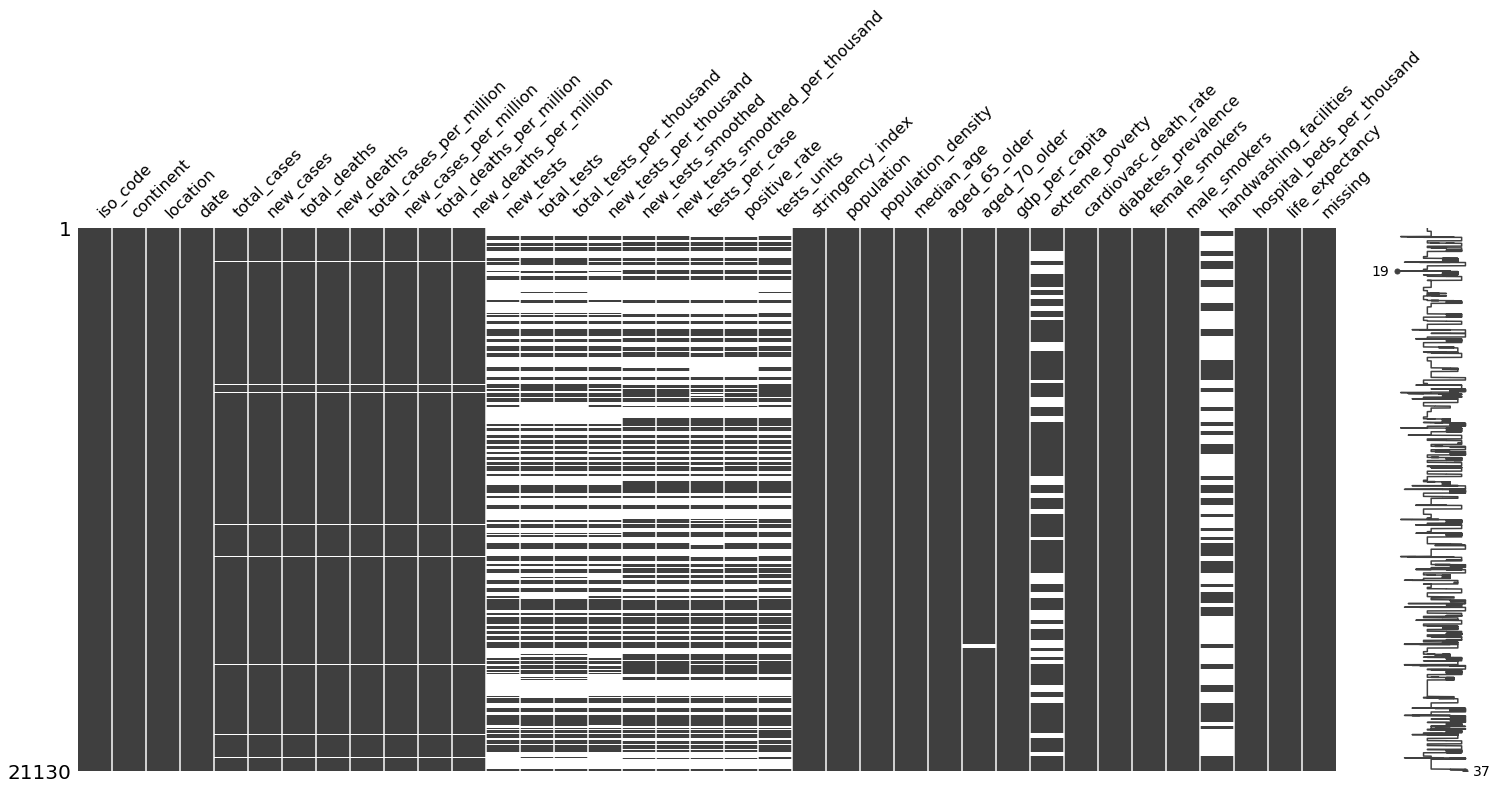

In [ ]:
# Assess missingness in new dataframe
msno.matrix(nonnull_data)

In [ ]:
## Narrowed down countries for analysis by continent 

## List of all of the countries
all_countries = sorted(list(set(nonnull_data.location)))
print("All countries: " + str(all_countries) + "\n")

## Countries in Oceania
oceania = list(set(nonnull_data[nonnull_data["continent"] == "Oceania"].location))
print("Oceania countries: " + str(oceania) + "\n")

## Countries in South America
s_america = list(set(nonnull_data[nonnull_data["continent"] == "South America"].location))
print("South America countries: " + str(s_america) + "\n")

## Countries in North America
n_america = list(set(nonnull_data[nonnull_data["continent"] == "North America"].location))
print("North America countries: " + str(n_america) + "\n")

## Countries inAsia
asia = list(set(nonnull_data[nonnull_data["continent"] == "Asia"].location))
print("Asia not null countries: " + str(asia) + "\n")

## Countries in Europe
europe = list(set(nonnull_data[nonnull_data["continent"] == "Europe"].location))
print("Europe countries: " + str(europe) + "\n")

## Countries in Africa
africa = list(set(nonnull_data[nonnull_data["continent"] == "Africa"].location))
print("Africa countries: " + str(africa) + "\n")

## Does not have continent (World and International)
null_continent = list(set(nonnull_data[nonnull_data["continent"].isnull()].location))
print("Null continent countries: " + str(null_continent) + "\n")

## How many countries to we have? 
print("We have " + str(len(all_countries)) + " for analysis")

All countries: ['Albania', 'Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Canada', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Liberia', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Mali', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Netherlands', 'New Zealand', 'Niger', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Paraguay', 'Philip

In [ ]:
# The data set we will be using
# Keep countries where countries is in all_countries
df = covid[covid["location"].isin(all_countries)]

# Save this dataframe into a csv
df.to_csv("covid_data.csv", index = False)

# Read this dataframe back in
df = pd.read_csv("covid_data.csv")

Note: Even after we move some countries to try to reduce missingess, there is still a lot of missing values in the testing variables. Let's take a deeper look into the countries with missing test data.

### How reliable is testing analysis? Countries with Missing Testing

In [ ]:
# Calculate the missingness rate for total_tests_per thousand by total NA values / total values
test_missingness = pd.DataFrame(df[df['total_tests_per_thousand'].isna()]['location'].value_counts().sort_values(ascending=False)/len(df.date.unique())).reset_index()
test_missingness = test_missingness.rename(columns={'location':'missingness', 'index':'location'})

# Find those countries with test missingness greater than 50%
test_missingness[test_missingness['missingness'] > 0.5]['location']

# Find the missingness of countries that have high positive case rates to see if 
# the proportion could be skewed
print(test_missingness[test_missingness['location'] == 'Chile'])
print(test_missingness[test_missingness['location'] == 'Panama'])
print(test_missingness[test_missingness['location'] == 'Singapore'])
print(test_missingness[test_missingness['location'] == 'Mexico'])
print(test_missingness[test_missingness['location'] == 'Ecuador'])
print(test_missingness[test_missingness['location'] == 'Argentina'])
print(test_missingness[test_missingness['location'] == 'Costa Rica'])
print(test_missingness[test_missingness['location'] == 'Qatar'])
print(test_missingness[test_missingness['location'] == 'Bangladesh'])
print(test_missingness[test_missingness['location'] == 'Colombia'])
print(test_missingness[test_missingness['location'] == 'South Africa'])


   location  missingness
98    Chile      0.13242
    location  missingness
118   Panama     0.018265
     location  missingness
13  Singapore     0.922374
    location  missingness
115   Mexico     0.027397
   location  missingness
67  Ecuador     0.360731
      location  missingness
107  Argentina     0.082192
       location  missingness
113  Costa Rica     0.027397
   location  missingness
66    Qatar     0.360731
       location  missingness
112  Bangladesh     0.031963
     location  missingness
120  Colombia     0.013699
         location  missingness
102  South Africa     0.118721


Notable countries missing tests: China, France, Sweden

## How are cases, tests, and deaths trending between continents of interest?

In [ ]:
df_today = df.loc[df.date == "2020-07-29"] # subset to only values with tests

## Explore testing in different continents vs number of cases and number of deaths
## Find the maximum cases, tests and deaths for each continent (since the metrics are cummulative) 


## See our separate functions python file
## Find the maximum cases, tests and deaths for each continent (since the metrics are cummulative)
continent_total_cases = sortedGroupbySum(df_today, 'continent', 'total_cases',False)
continent_total_tests = sortedGroupbySum(df_today, 'continent', 'total_tests',False)
continent_total_deaths = sortedGroupbySum(df_today, 'continent', 'total_deaths',False)
print(continent_total_cases)
print(continent_total_tests)
print(continent_total_deaths)

## Find the maximum cases, tests and deaths for each continent while controlling for population
continent_total_cases_control = sortedGroupbySum(df_today, 'continent','total_cases_per_million',False)
continent_total_tests_control = sortedGroupbySum(df_today, 'continent','total_tests_per_thousand',False)
continent_total_deaths_control = sortedGroupbySum(df_today, 'continent', 'total_deaths_per_million', False)
print(continent_total_cases_control)
print(continent_total_tests_control)
print(continent_total_deaths_control)

## Sort number of cases controlled by number of tests
## We expect that countries who test more will see more cases
## What percent of tests result in a positive case per country?
## Warning: This could be skewed by low testing rates, so compare with total number of tests per population
## and look for missingness 
## Notice: South America and Africa have high case rate but low total tests

continent_case_rate = (continent_total_cases/continent_total_tests)
# print(continent_total_tests_control.sort_values(ascending=False))
print(continent_case_rate.sort_values(ascending=False))

## Sort death rate per continent

continent_death_rate = (continent_total_deaths)/(continent_total_cases)
print(continent_death_rate.sort_values(ascending=False))


continent
North America    5036713.0
Asia             3836962.0
South America    3357460.0
Europe           2754570.0
Africa            707472.0
Oceania            16540.0
Name: total_cases, dtype: float64
continent
North America    59230368.0
Europe           58553042.0
Asia             44614602.0
Africa            4564952.0
South America     4087564.0
Oceania            469475.0
Name: total_tests, dtype: float64
continent
North America    206211.0
Europe           201043.0
South America    115623.0
Asia              85985.0
Africa            15034.0
Oceania             189.0
Name: total_deaths, dtype: float64
continent
Asia             150156.252
Europe           117190.193
South America     47183.287
North America     46609.720
Africa            26445.593
Oceania             880.993
Name: total_cases_per_million, dtype: float64
continent
Europe           3355.262
Asia             1578.034
North America     374.796
South America     184.084
Oceania           103.609
Africa           

Total Cases: North America, South America, Asia, Europe, Africa, Oceania  
Total Tests: North America, Europe, Asia, Oceania, Africa, South America  
Total Deaths: North America, South America, Europe, Asia, Africa, Oceania 

Total Cases per Million: Asia, South America, North America, Europe, Africa, Oceania  
Total Tests per Thousand: Europe, Asia, North America, Oceania, South America, Africa  
Total Deaths per Million: Europe, South America, North America, Asia, Africa, Oceania  

Positive case rate: South America, Africa, Asia, North America, Europe, Oceania  

Death rate: Europe, South America, North America, Asia, Africa, Oceania  

In [ ]:
## Create a dataframe grouped by continent and date with total cases, total tests and total deaths controlling for population
df_cont = df.groupby(['continent', 'date'])[['total_cases_per_million', 'total_tests_per_thousand', 'total_deaths_per_million']].sum().reset_index()

In [ ]:
## Plot total cases per million over time by continent
fig = px.line(df_cont, x="date", y="total_cases_per_million", title = 'Total Cases per Million People by Continent', color='continent')
fig.show()

In [ ]:
## Plot total tests per thousand over time by continent
fig = px.line(df_cont, x="date", y="total_tests_per_thousand", title = 'Total Tests per Thousand People by Continent', color='continent')
fig.show()

In [ ]:
## Plot total deaths per million over time by continent
fig = px.line(df_cont, x="date", y="total_deaths_per_million", title = 'Total Deaths per Million People by Continent', color='continent')
#fig.update_layout(yaxis_type="log")
fig.show()

## How are cases, tests, and deaths trending between the top countries in each category?

In [ ]:
## Top Countries Analysis

## Group data by continent and country: cases, tests, deaths, find total cases, tests and deaths max
country_total_cases = sortedGroupbyMax(df,['continent', 'location'],'total_cases', False)
country_total_tests = sortedGroupbyMax(df, ['continent', 'location'], 'total_tests', False)
country_total_deaths = sortedGroupbyMax(df, ['continent', 'location'], 'total_deaths', False)

## Sort to obtain top 10 countries for total cases, tests, and deaths
print(country_total_cases.head(10))
print(country_total_tests.head(10))
print(country_total_deaths.head(10))

# ## Find max cases, totals and death while controlling for population
# country_total_cases_control = df.groupby(['continent', 'location'])['total_cases_per_million'].max()
# country_total_tests_control = df.groupby(['continent', 'location'])['total_tests_per_thousand'].max()
# country_total_deaths_control = df.groupby(['continent', 'location'])['total_deaths_per_million'].max()
# ## Sort to obtain top 10 countries for total cases, tests, and deaths while controlling for population
# print(country_total_cases_control.sort_values(ascending=False).head(10))
# print(country_total_tests_control.sort_values(ascending=False).head(10))
# print(country_total_deaths_control.sort_values(ascending=False).head(10))

## Find max cases, totals and death while controlling for population
country_total_cases_control = sortedGroupbyMax(df,['continent', 'location'],'total_cases_per_million', False)
country_total_tests_control = sortedGroupbyMax(df, ['continent', 'location'], 'total_tests_per_thousand', False)
country_total_deaths_control = sortedGroupbyMax(df, ['continent', 'location'], 'total_deaths_per_million', False)
print(country_total_cases_control.head(10))
print(country_total_tests_control.head(10))
print(country_total_deaths_control.head(10))

## Number of cases controlled by number of tests - Countries that test more will see more cases
## Only calculate case rate for countries with positive test rates 
country_total_tests_pos = country_total_tests[country_total_tests > 0]
country_case_rate = (country_total_cases/country_total_tests_pos)
country_case_rate = pd.DataFrame(country_case_rate).reset_index().rename(columns={0:'case_rate'})

## Only keep case rate values that have a finite value
country_case_rate = country_case_rate[country_case_rate['case_rate'] != np.inf]
country_case_rate
print(country_total_tests_control.sort_values(ascending=False).head(10))
print(country_case_rate.sort_values(by='case_rate', ascending=False).head(11))


## Calculate and sort death rate by top 10 countries
country_death_rate = (country_total_deaths)/(country_total_cases)
print(country_death_rate.sort_values(ascending=False).head(10))

continent      location      
North America  United States     4771087.0
South America  Brazil            2801921.0
Asia           India             1908254.0
Europe         Russia             861423.0
Africa         South Africa       521318.0
North America  Mexico             449961.0
South America  Chile              362962.0
               Colombia           334979.0
Asia           Iran               314786.0
Europe         United Kingdom     306293.0
Name: total_cases, dtype: float64
continent      location            
North America  United States           57543852.0
Europe         Russia                  29201862.0
Asia           India                   20202858.0
Europe         United Kingdom           9818696.0
               Germany                  8006135.0
Asia           United Arab Emirates     5189891.0
               Turkey                   4927217.0
Europe         Spain                    4652493.0
Oceania        Australia                4386911.0
North America  Canad

In [ ]:
df[df['location'] == 'Brazil'][['date', 'total_cases', 'total_tests']].max() ## stopped reporting testing -- more cases than tests; inaccurate data?
## will not include in top 10 

date            2020-08-05
total_cases    2.80192e+06
total_tests    2.53655e+06
dtype: object

Total Cases: United States, Brazil, India, Russia, South Africa, Mexico, Chile, United Kingdom, Iran, Colombia  
Total Tests: United States, Russia, India, United Kingdom, Germany, Italy, United Arab Emirates, Turkey, Spain, Australia  
Total Deaths: United States, Brazil, Mexico, United Kingdom, India, Italy, France, Spain, Iran, Russia   

Total Cases per Million: Qatar, Bahrain, Chile, Kuwait, Oman, Panama, United States, Brazil, Luxembourg, Singapore  
Total Tests per Thousand: Luxembourg, United Arab Emirates, Bahrain, Denmar, Iceland, Russia, Lithuania, Israel, Qatar, United States  
Total Deaths per Million: Belgium, United Kingdom, Spain, Italy, Sweden, Chile, France, United States, Brazil, Netherlands  

Positive case rate: Mexico, Ecuador, Argentina, Panama, Costa Rica, Qatar, Chile, Bangladesh, Colombia, South Africa  

Death rate: Yemen, France, United Kingdom, Belgium, Italy, Hungary, Netherlands, Mexico, Spain, Canada  

In [ ]:
## Create list of top 10 countries for total cases, tests and deaths
top_case = pd.DataFrame(country_total_cases_control.sort_values(ascending=False).head(10).reset_index())['location'].to_list()
top_test = pd.DataFrame(country_total_tests_control.sort_values(ascending=False).head(10).reset_index())['location'].to_list()
top_death = pd.DataFrame(country_total_deaths_control.sort_values(ascending=False).head(10).reset_index())['location'].to_list()

## Create dataframe pared down to only top 10 countries for each respective metric
df_case = df[df['location'].isin(top_case)]
df_test = df[df['location'].isin(top_test)]
df_death = df[df['location'].isin(top_death)]

# ## Group dataframes with top 10 countries by date, continent and country
# df_top_10_cases = df_case.groupby(['date', 'continent', 'location'])['total_cases_per_million'].sum().reset_index()
# df_top_10_tests = df_test.groupby(['date', 'continent', 'location'])['total_tests_per_thousand'].sum().reset_index()
# df_top_10_deaths = df_death.groupby(['date', 'continent', 'location'])['total_deaths_per_million'].sum().reset_index()

## Group dataframes with top 10 countries by date, continent and country
df_top_10_cases = sortedGroupbySum(df_case, ['date', 'continent', 'location'], 'total_cases_per_million', False).reset_index()
df_top_10_tests = sortedGroupbySum(df_test, ['date', 'continent', 'location'], 'total_tests_per_thousand', False).reset_index()
df_top_10_deaths = sortedGroupbySum(df_death, ['date', 'continent', 'location'], 'total_deaths_per_million', False).reset_index()

In [ ]:
## Plot top 10 countries for total cases over time 
fig = px.line(df_top_10_cases, x="date", y="total_cases_per_million", title = 'Total Cases per million people by Country', color='location')
fig.show()

In [ ]:
## Plot top 10 countries for total tests over time 
df_top_10_tests2 = df_top_10_tests[df_top_10_tests['total_tests_per_thousand'] > 0]
fig = px.line(df_top_10_tests2, x="date", y="total_tests_per_thousand", title = 'Total Tests per thousand people by Country', color='location')
fig.show()

In [ ]:
## Plot top 10 countries for total deaths over time 
fig = px.line(df_top_10_deaths, x="date", y="total_deaths_per_million", title = 'Total Deaths per million people by Country', color='location')
fig.show()

## How does GDP Per Capita affect the number of deaths per million?

In [ ]:
## GDP Per capita on max total number of deaths per million
# I suspect there will be less cases in countries with lower gdp
#    Is this because of less testing? Or less travel => less spread?
#    Maybe try to pull in some of the health data

# Dataframe with gdp per capita and total deaths by country 
gdp_against_total_deaths = df.groupby("location").agg(gdp_per_capita = ("gdp_per_capita", "first"), total_deaths_per_million = ("total_deaths_per_million", "max"))
gdp_against_total_deaths

# Get the 20 countries with highest GDP, what are their total deaths?
top_20_gdp_death = gdp_against_total_deaths.sort_values(by = "gdp_per_capita", ascending = False).head(20)
top_20_gdp_death

# Average total deaths for these top 20 countries (with US)?
avg_total_deaths_top_20 = np.mean(top_20_gdp_death["total_deaths_per_million"])
avg_total_deaths_top_20      # Output = 155.3052

# Get the 20 countries with lowest GDP, what are their total deaths?
bot_20_gdp_death = gdp_against_total_deaths.sort_values(by = "gdp_per_capita").head(20)
bot_20_gdp_death

# Average total deaths for these bottom 20 countries?
avg_total_deaths_bot_20 = np.mean(bot_20_gdp_death["total_deaths_per_million"])
avg_total_deaths_bot_20      # Output = 17.54

# Ratio of top 20 to bottom 20
avg_total_deaths_top_20/avg_total_deaths_bot_20  # Output = 8.85
# This means top 20 countries have on average 8.85 times more deaths per million than bottom 20 countries 

# Check that top_20_gdp_death and bot_20_gdp_death are equal to 20
assert(len(top_20_gdp_death) == 20)
assert(len(bot_20_gdp_death) == 20)

# Make dataframe for information
data = {"GDP Per Cap": ["top 20 countries", "bottom 20 countries"],
        "Average total deaths per million": [avg_total_deaths_top_20, avg_total_deaths_bot_20]}

avg_death_gdp = pd.DataFrame(data)
avg_death_gdp

,GDP Per Cap,Average total deaths per million
0,top 20 countries,157.72820
1,bottom 20 countries,18.77805


## How does Hospital Beds Per Thousand Impact the Death Rate?

Although the hospital beds for each country are not updated

In [ ]:
## subset to only include relevant columns
subset = df_today.loc[:,['total_deaths','hospital_beds_per_thousand','iso_code','location','population','population_density','total_deaths_per_million']]

## calculate total_deaths_per_capita in case we want to use this metric
subset['total_deaths_per_capita'] = subset.loc[:,'total_deaths'] / subset.loc[:,'population']

#E subset['beds_per_capita'] = subset.loc[:,'hospital_beds_per_thousand'] * 1000 / subset.loc[:,'population']
fig = subset.plot.scatter(x='hospital_beds_per_thousand',y='total_deaths_per_million', hover_data=['location','population'], color='iso_code',
labels={"total_deaths_per_million": "Total Deaths (per Million)","iso_code": "ISO Code","hospital_beds_per_thousand": "Hospital Beds per Thousand"}, title="Total Deaths by Countries Through in Relation to Date of First COVID Death")
fig.show()

## Examining Total Deaths per Million by Countries with a large amount of Hospital Beds

In [ ]:
## subset to list of media highlighted countries
countries_list = ['France', 'Italy','United Kingdom', 'Sweden', 'Spain', 'Germany', 'Greece', 'Russia', 'United States', 'Canada', 'Mexico', 'China', 'South Korea', 'Japan', 'India']
subset2 = df.loc[(df.loc[:,'location'].isin(countries_list)),:]

## identify which countries were in 10% of number of hospital beds per 1000
subset2.loc[:,'high_ratio_beds'] = subset2.loc[:,'hospital_beds_per_thousand'] > np.quantile(df.loc[:,'hospital_beds_per_thousand'],0.90)

## Plot using plotly number of deaths by date and color by number of hospital
pd.options.plotting.backend = "plotly"
fig = subset2.dropna(subset=['date','total_deaths_per_million']).plot.scatter(x='date',y='total_deaths_per_million', hover_data=['location','population'], color='high_ratio_beds',
labels={"total_deaths_per_million": "Total Deaths (per Million)","date": "Date","high_ratio_beds": "Country in 90th pct of Bed Ratio"}, title="Total Deaths by Countries With Respect to Hospital Beds") #,facet_row="variable")
fig.update_traces(marker=dict(size=3),selector=dict(mode='markers'))
fig.show()

## A visual check here indicated that using a line plot caused straight lines to appear 
## between the point associated with today's deaths per million of one country and the 
## first report of deaths per million of the next country. Since a scatterplot allows us 
## to still see the curve but does not make the artificial connection between countries,
## we decided to switch from a line graph to a scatter plot.


/opt/venv/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/venv/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Examining Total Deaths by Date of a Country's First COVID Death

In [ ]:
## Get ride of entries of 0 deaths
some_deaths = df[df['total_deaths'] != 0]

## drop NAs
some_deaths2 = some_deaths.dropna(subset=['total_deaths'])
## https://stackoverflow.com/questions/20069009/pandas-get-topmost-n-records-within-each-group

## Group by country, sort values by date and then take oldest entry (should give us oldest non-zero value)
first_deaths = some_deaths2.groupby(['iso_code']).apply(lambda x: x.sort_values(['date'],ascending=True)).reset_index(drop=True).groupby("iso_code").head(1)

# assert that the new dataframe's length is the same as the number of unique countries
assert(len(first_deaths) == len(some_deaths2.iso_code.unique()))

# merge the dataframe with the countries and date of first COVID death with the dataframe holding today's info
merged = pd.merge(first_deaths[['iso_code','date']], df_today.drop(columns=['date']), on=['iso_code'])

# plot today's total_deaths_per_million against the country's date of first COVID death. Color by hospital bed
fig = merged.plot.scatter(x='date',y='total_deaths_per_million', hover_data=['location','population'], color='hospital_beds_per_thousand',
labels={"total_deaths_per_million": "Total Deaths (per Million)","date": "Date","hospital_beds_per_thousand": "# of Hospital Beds per Thousand"}, title="Total Deaths by Countries Through in Relation to Date of First COVID Death")
fig.show()

## A visual check appears to be validate the correctness of this plot. 
## We hovered over certain countries and verified their values from the dataset itself.

## How does the Smoking Rate of a Country Impact the Death Rate? 

In [ ]:
## Smoking Rate vs. Death Rate (per thousand)
# based on intuition, higher rates of smoking would seem to logically indicate higher death rates

# OWID COVID data is separated by gender
# find percentage of population by M/F
# make dataframe of gender percentiles as decimals
gender_df = pd.read_csv("world-gender.csv", skiprows = 4, usecols=["Country Name", "Country Code", "2019"])

gender_df["2019"] = gender_df["2019"] / 100 #create new column of percentage by gender
gender_df.columns = ["Country Name", "iso_code", "gender_percent"] #rename columns for merge

#merge gender information from world bank
gender_joined = pd.merge(gender_df,df_today[['iso_code','total_deaths_per_million','female_smokers','male_smokers', 'population']], on="iso_code")
# calculate smoking rate for female pop by turning percentage of population into decimal representative of whole
gender_joined["female_smokers"] = gender_joined["female_smokers"]/100 * gender_joined["gender_percent"]
gender_joined["male_smokers"] = gender_joined["male_smokers"]/100 * (1-gender_joined["gender_percent"])
#combine for total percentage of population
gender_joined["smokers_per_thousand"] = (gender_joined["female_smokers"] + gender_joined["male_smokers"]) * 1000

#pare down dataframe
gender_joined_df = gender_joined[['Country Name', 'iso_code','total_deaths_per_million','smokers_per_thousand', 'population']]
gender_joined_df

# Dataframe with smoking population percentage and total deaths by million by country 
smoking_against_total_deaths = gender_joined_df.groupby('Country Name').agg(smokers_per_thousand = ('smokers_per_thousand', 'first'), total_deaths_per_million = ('total_deaths_per_million', 'max'))
smoking_against_total_deaths

# Get the 20 countries with highest percentages of smokers, what are their total deaths?
top_20_smoking_death = smoking_against_total_deaths.sort_values(by = "smokers_per_thousand", ascending = False).head(20)
print(top_20_smoking_death)

# Average total deaths for these top 20 countries?
avg_total_deaths_top_20 = np.mean(top_20_smoking_death["total_deaths_per_million"])
avg_total_deaths_top_20      # Output = 90.768

# Get the 20 countries with lowest smoking rates, what are their total deaths?
bot_20_smoking_death = smoking_against_total_deaths.sort_values(by = "smokers_per_thousand").head(20)
bot_20_smoking_death

# Average total deaths for these bottom 20 countries?
avg_total_deaths_bot_20 = np.mean(bot_20_smoking_death["total_deaths_per_million"])
avg_total_deaths_bot_20      # Output = 71.33

# Ratio of top 20 to bottom 20
avg_total_deaths_top_20/avg_total_deaths_bot_20  # Output = 1.272
# This means the 20 countries with highest smoking rates have on average 1.272 times more deaths per million than bottom 20 countries 

# Check that top_20_gdp_death and bot_20_gdp_death are equal to 20
assert(len(top_20_smoking_death) == 20)
assert(len(bot_20_smoking_death) == 20)

# Make dataframe for information
data = {"Average Smokers Per Thousand": ["top 20 countries", "bottom 20 countries"],
        "Average Total Deaths per Million": [avg_total_deaths_top_20, avg_total_deaths_bot_20]}

avg_death_by_smoking = pd.DataFrame(data)
avg_death_by_smoking

                        smokers_per_thousand  total_deaths_per_million
Country Name                                                          
Greece                            434.965988                    19.476
Timor-Leste                       425.857296                     0.000
Indonesia                         397.092011                    17.918
Russian Federation                395.740320                    92.535
Serbia                            389.247299                    80.975
Bosnia and Herzegovina            387.713419                    90.526
Chile                             377.982917                   483.359
Latvia                            372.952910                    16.435
Bulgaria                          370.457085                    51.091
Croatia                           369.981301                    34.103
Cyprus                            361.502762                    21.692
Czech Republic                    343.387203                    34.831
Lebano

,Average Smokers Per Thousand,Average Total Deaths per Million
0,top 20 countries,87.88770
1,bottom 20 countries,66.54745


In [ ]:
#plot this data
fig = gender_joined_df.plot.scatter(x='smokers_per_thousand',y='total_deaths_per_million', hover_data=['Country Name','population'], color='iso_code', 
labels={'total_deaths_per_million': 'Total Deaths (per Million)','smokers_per_thousand': 'Smokers (per Thousand)'}, title="Total Deaths by Countries vs. Smoking Prevalence")
fig.show()

Intuitively, you might expect that the countries with the highest rates of smoking would likely have higher death rates due to the interaction of viral particles and lung tissue.

In [ ]:
gender_joined_df['smokers_per_thousand'].corr(gender_joined_df['total_deaths_per_million'])

0.09756271131654508

## Life Expectancy vs Death Rate by Continent and Country
Could life expectancy be related to the death rate per continent and country? If they are related, could the confounding variable be related to access to healthcare?

In [ ]:
## Life expectancy vs death rate

## Find max total cases and total deaths by continent
continent_total_cases = df.groupby(['continent'])['total_cases'].max()
continent_total_deaths = df.groupby(['continent'])['total_deaths'].max()

## Calculate death rate by continent
continent_death_rate = continent_total_deaths/continent_total_cases

print("Continent death rate: ")
print(continent_death_rate.sort_values(ascending=False))

## Find unique combinations of countries and their respective life expectancies 
df[['location', 'life_expectancy']].drop_duplicates().sort_values(by='life_expectancy').head(10)

## Top 10 countries by total deaths (with and without control for population) and their respective life expectancies 
df.groupby(['location', 'life_expectancy'])['total_deaths'].max().sort_values(ascending=False).head(10)
df.groupby(['location', 'life_expectancy'])['total_deaths_per_million'].max().sort_values(ascending=False).head(10)

## Find max total cases, tests and deaths for countries
country_total_cases = df.groupby(['continent', 'location'])['total_cases'].max()
country_total_tests = df.groupby(['continent', 'location'])['total_tests'].max()
country_total_deaths = df.groupby(['continent', 'location'])['total_deaths'].max()

## Calculate death rate by country
country_death_rate = (country_total_deaths/country_total_cases)

## Find top 10 countries with highest death rate
print("\nTop 10 Countries Death Rates: ")
print(country_death_rate.sort_values(ascending=False).head(10))

## Sort countries by life expectancy
death_df = df[['location', 'life_expectancy']].drop_duplicates().sort_values(by='life_expectancy', ascending=False)
## Create dataframe with countries and respective death rates

country_dr = pd.DataFrame(country_death_rate).reset_index().rename(columns={0:'death_rate'})
## Merge data frames with countries and respective life expectancies and death rates
death_df = pd.merge(death_df, country_dr, how='right', on='location')

## Find top 10 countries with highest death rate and compare life expectancy
print("\nTop 10 Countries Death Rates vs Life Expectancy")
print(death_df.sort_values(by='death_rate', ascending=False).dropna().head(10))

## Find top 10 countries with lowest life expectancy and compare death rate 
print("\nTop 10 Countries Lowest Life Expectancy vs Death Rates")
print(death_df.sort_values(by='life_expectancy', ascending=True).head(10))

## Find correlation between death rate and life expectancy
death_df.corr()

Continent death rate: 
continent
Europe           0.053747
South America    0.034198
North America    0.032866
Asia             0.020854
Africa           0.017041
Oceania          0.012387
dtype: float64

Top 10 Countries Death Rates: 
continent      location      
Asia           Yemen             0.287500
Europe         France            0.157518
               United Kingdom    0.151159
               Italy             0.141579
               Belgium           0.139636
               Hungary           0.131342
               Netherlands       0.109910
North America  Mexico            0.108607
Europe         Spain             0.094949
North America  Canada            0.076059
dtype: float64

Top 10 Countries Death Rates vs Life Expectancy
           location  life_expectancy      continent  death_rate
104           Yemen            66.12           Asia    0.287500
10           France            82.66         Europe    0.157518
24   United Kingdom            81.32         Europe    0.1

,life_expectancy,death_rate
life_expectancy,1.000000,0.165578
death_rate,0.165578,1.000000


There is a low correlation between life expectancy and death rate.

## Freedom Index and Relation to COVID Deaths

In [ ]:
## Read in freedom data
# https://plotly.com/python/time-series/ 
freedom_df = pd.read_csv("human-freedom-index-2019.csv")
freedom_df.columns

## Subset to most recent year
freedom_df = freedom_df[freedom_df['year'] == 2017]

In [ ]:
## subset to only include relevant variables
freed_subset = freedom_df[['ISO_code','hf_score','pf_score','ef_score','pf_movement_domestic','pf_movement']]
## rename headers for ease in merging
freed_subset.columns = ['iso_code','hf_score','pf_score','ef_score','pf_movement_domestic','pf_movement']
## join the data together
freedom_joined = pd.merge(freed_subset,df_today[['iso_code','total_deaths','total_deaths_per_million']])

## Human Freedom Index
boolean = ["-" in i for i in freedom_joined['hf_score']]
freedom_joined.loc[boolean,'hf_score'] = None
freedom_joined.dropna(inplace=True)
print("Human Freedom Index Correlation")
print(np.corrcoef(freedom_joined['hf_score'].astype(float), freedom_joined['total_deaths_per_million']))
# print(freedom_joined['hf_score'].astype(float).corr(freedom_joined['total_deaths_per_million']))

## Economic Freedom Index Analysis
boolean = ["-" in i for i in freedom_joined['ef_score']]
freedom_joined.loc[boolean,'ef_score'] = None
freedom_joined.dropna(inplace=True)
print("Economic Freedom Index Correlation")
print(np.corrcoef(freedom_joined['ef_score'].astype(float), freedom_joined['total_deaths_per_million']))

## Personal Freedom Index Analysis
boolean = ["-" in i for i in freedom_joined['pf_score']]
freedom_joined.loc[boolean,'pf_score'] = None
freedom_joined.dropna(inplace=True)
print("Personal Freedom Index Correlation")
print(np.corrcoef(freedom_joined['pf_score'].astype(float), freedom_joined['total_deaths_per_million']))

## Movement Freedom Index Analysis
boolean = ["-" in i for i in freedom_joined['pf_movement']]
freedom_joined.loc[boolean,'pf_movement'] = None
freedom_joined.dropna(inplace=True)
print("Movement Freedom Index Correlation")
print(np.corrcoef(freedom_joined['pf_movement'].astype(float), freedom_joined['total_deaths_per_million']))

## Domestic Movement Index Analysis
boolean = ["-" in i for i in freedom_joined['pf_movement_domestic']]
freedom_joined.loc[boolean,'pf_movement_domestic'] = None
freedom_joined.dropna(inplace=True)
print("Domestic Movement Freedom Index Correlation")
print(np.corrcoef(freedom_joined['pf_movement_domestic'].astype(float), freedom_joined['total_deaths_per_million']))


Human Freedom Index Correlation
[[1.         0.36241117]
 [0.36241117 1.        ]]
Economic Freedom Index Correlation
[[1.         0.27585992]
 [0.27585992 1.        ]]
Personal Freedom Index Correlation
[[1.         0.36773392]
 [0.36773392 1.        ]]
Movement Freedom Index Correlation
[[1.         0.29258151]
 [0.29258151 1.        ]]
Domestic Movement Freedom Index Correlation
[[1.         0.20040616]
 [0.20040616 1.        ]]


In [ ]:
#### Testing Accuracy of Freedom Index with FreedomHouse Verification ####
## Read in Freedomhouse Index data
freedomhouse_df = pd.read_excel("2020_Freedomhouse.xlsx")
## rename columns to merge
freedomhouse_df.columns = ['location','Political Rights','Civil Liberties', 'Status']
## merge on country name
freedomhouse_joined = pd.merge(freedomhouse_df,df_today[['location','iso_code','total_deaths','total_deaths_per_million']])
## correlation between Political Rights and Deaths per Million
print()
print(np.corrcoef(freedomhouse_joined['Political Rights'].astype(float), freedomhouse_joined['total_deaths_per_million']))
## correlation between Civil Liberties and Deaths per Million
print()
print(np.corrcoef(freedomhouse_joined['Civil Liberties'].astype(float), freedomhouse_joined['total_deaths_per_million']))


[[ 1.         -0.34685762]
 [-0.34685762  1.        ]]

[[ 1.         -0.37430185]
 [-0.37430185  1.        ]]


## Stringency Index on the Number of Deaths
We will begin by lookin at how the stringency index has changed for certain countries of interest over time.

In [ ]:
# Look at how stringency index for countries has changed overtime
stringency_narrow = df[df["location"].isin(['France', 'Italy','United Kingdom', 'Sweden', 'Spain', 'Germany', 'Greece', 'Russia', 'United States', 'Canada', 'Mexico', 'China', 'South Korea', 'Japan', 'India'])]
fig = stringency_narrow.plot.line(x = "date", y = "stringency_index", title = "How the stringency index changes over time for different countries", color = "location")
fig.show()

In [ ]:
# Filter for data on countries after a they had their first case

# Make sure data is organized by date for each country
org_data = df.sort_values(by = ["location", "date"])

stringency_total_cases_nonzero = org_data[org_data["total_cases"] > 0]
stringency_total_cases_nonzero = stringency_total_cases_nonzero[stringency_total_cases_nonzero["location"].isin(stringency_narrow["location"])]
stringency_total_cases_nonzero = stringency_total_cases_nonzero[["location", "date", "stringency_index", "total_cases_per_million", "new_cases_per_million", "total_deaths_per_million", "new_deaths_per_million"]]

# Get average stringency for each country 
stringency_total_cases_nonzero.groupby("location").agg(stringency_index = ("stringency_index", "max"), total_cases_per_million = ("total_cases_per_million", "max"), total_deaths_per_million = ("total_deaths_per_million", "max")).sort_values(by = "stringency_index", ascending = False)

,stringency_index,total_cases_per_million,total_deaths_per_million
location,,,
India,100.00,1382.788,28.837
Italy,93.52,4108.692,581.706
France,90.74,2946.586,464.139
Russia,87.04,5902.807,98.339
Spain,85.19,6476.642,614.953
Greece,84.26,465.794,20.052
Mexico,82.41,3489.889,379.027
South Korea,82.41,281.963,5.890
China,81.94,61.283,3.249


In [ ]:
## Stringency index on max total number of deaths per million
# I suspect higher stringency will mean less deaths
# Max stringency after first case 

# Dataframe with max stringency index and total deaths per million by country 
cases_nonzero = org_data[org_data["total_cases"] > 0].copy()
max_stringency_against_death = cases_nonzero.groupby("location").agg(max_stringency_index = ("stringency_index", "max"), total_deaths_per_million = ("total_deaths_per_million", "max"))
max_stringency_against_death


# Get 20 countries with highest max stringency index, what are their average total deaths per million?
top_20_stringency = max_stringency_against_death.sort_values(by = "max_stringency_index", ascending = False).head(20)
top_20_stringency

# Average total deaths per million for 20 countries with highest stringency index
avg_deaths_top_20_stringency = np.mean(top_20_stringency["total_deaths_per_million"])
avg_deaths_top_20_stringency        # Output: 38.06925

# Get 20 countries with lowest max stringency index, what are their average total deaths per million?
bot_20_stringency = max_stringency_against_death.sort_values(by = "max_stringency_index").head(20)
bot_20_stringency

# Average total deaths per million for 20 countries with lowest stringency index
avg_deaths_bot_20_stringency = np.mean(bot_20_stringency["total_deaths_per_million"])
avg_deaths_bot_20_stringency        # Output: 87.9381

# Ratio of top 20 to bottom 20
print(avg_deaths_bot_20_stringency/avg_deaths_top_20_stringency)     # Output: 2.3099509446600606
# This means bottom 20 countries have on average 2.3 times more deaths per million than top 20 countries 

# Check that top_20_gdp_death and bot_20_gdp_death are equal to 20
assert(len(top_20_stringency) == 20)
assert(len(bot_20_stringency) == 20)

# Make dataframe for information
data = {"Max Stringency Index": ["top 20 countries", "bottom 20 countries"],
        "Average total death per million": [avg_deaths_top_20_stringency, avg_deaths_bot_20_stringency]}

avg_death_by_stringency = pd.DataFrame(data)
avg_death_by_stringency

2.2149336744900547


,Max Stringency Index,Average total death per million
0,top 20 countries,40.4897
1,bottom 20 countries,89.6820


In [ ]:
# Is there a correlation between the stringency index and the drop in new cases and deaths?
two_weeks = stringency_affect_n_weeks_later(df, 2)

# Check to make sure that two_weeks is the correct length
assert(len(df), len(two_weeks) + 2*7*len(all_countries))
assert(len(df[df["location"] == all_countries[0]]), 2*7 + len(two_weeks[two_weeks["location"] == all_countries[0]]))

# Print correlation
two_weeks.corr()

<>:5: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

<>:6: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

<>:5: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

<>:6: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

<>:5: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

<>:6: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

/opt/venv/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-74-426a5f9ab22d>:5: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

<ipython-input-74-426a5f9ab22d>:6: SyntaxWarning:

assertion is always true, perhaps remove parentheses?



,stringency_index,change_in_new_cases_per_million,change_in_new_deaths_per_million
stringency_index,1.000000,-0.001932,0.006701
change_in_new_cases_per_million,-0.001932,1.000000,0.389248
change_in_new_deaths_per_million,0.006701,0.389248,1.000000


In [ ]:
# Is there a correlation between the stringency index and the drop in new cases and deaths?
three_weeks = stringency_affect_n_weeks_later(df, 3)

# Check that three weeks is the correct length
assert(len(df), len(three_weeks) + 3*7*len(all_countries))
assert(len(df[df["location"] == all_countries[0]]), 3*7 + len(three_weeks[three_weeks["location"] == all_countries[0]]))

# Correlation matrix
three_weeks.corr()

<>:5: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

<>:6: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

<>:5: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

<>:6: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

<>:5: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

<>:6: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

/opt/venv/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-113-dc98ddc79b82>:5: SyntaxWarning:

assertion is always true, perhaps remove parentheses?

<ipython-input-113-dc98ddc79b82>:6: SyntaxWarning:

assertion is always true, perhaps remove parentheses?



,stringency_index,change_in_new_cases_per_million,change_in_new_deaths_per_million
stringency_index,1.000000,0.009722,0.036245
change_in_new_cases_per_million,0.009722,1.000000,0.341814
change_in_new_deaths_per_million,0.036245,0.341814,1.000000


## Try it Yourself
Enter in country ISO Codes, then input "stop" when you are done. Running the following cell will show a comparison of only those countries.  
Examples:  
  USA: United States   
  MEX: Mexico  
  GBR: United Kingdom  
  CHN: China  
  JPN: Japan  

In [ ]:
inp = ""
country_list = []
while inp.lower() != "stop":
    inp = input("Enter an ISO Code: ")
    if inp.upper() in df['iso_code'].unique():
        country_list.append(inp.upper())
    elif inp.lower() == "stop":
        print("Plotting your countries!")
    else:
        print("Unable to add {}. Try a new ISO Code".format(inp))

if len(country_list) > 0:
    stringency_narrow = df[df["iso_code"].isin(country_list)]
    fig = stringency_narrow.plot.line(x = "date", y = "stringency_index", title = "How the stringency index changes over time for different countries", color = "location")
    fig.show()

Plotting your countries!
